In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import ShuffleSplit, cross_val_score
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold, KFold, GroupKFold
import time

In [107]:
train = pd.read_csv("G:/JOB-A-Thon/train_Df64byy.csv")

test = pd.read_csv("G:/JOB-A-Thon/test_YCcRUnU.csv")

sub = pd.read_csv("G:/JOB-A-Thon/sample_submission_QrCyCoT.csv")

In [108]:
train.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [109]:
test.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0


In [110]:
train.shape, test.shape

((50882, 14), (21805, 13))

In [111]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [112]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21805 entries, 0 to 21804
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       21805 non-null  int64  
 1   City_Code                21805 non-null  object 
 2   Region_Code              21805 non-null  int64  
 3   Accomodation_Type        21805 non-null  object 
 4   Reco_Insurance_Type      21805 non-null  object 
 5   Upper_Age                21805 non-null  int64  
 6   Lower_Age                21805 non-null  int64  
 7   Is_Spouse                21805 non-null  object 
 8   Health Indicator         16778 non-null  object 
 9   Holding_Policy_Duration  13202 non-null  object 
 10  Holding_Policy_Type      13202 non-null  float64
 11  Reco_Policy_Cat          21805 non-null  int64  
 12  Reco_Policy_Premium      21805 non-null  float64
dtypes: float64(2), int64(5), object(6)
memory usage: 2.2+ MB


In [113]:
train.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [114]:
test.isnull().sum()

ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
Reco_Policy_Cat               0
Reco_Policy_Premium           0
dtype: int64

In [115]:
float(100.0*11691/50882)

22.97669116780001

In [116]:
train['Health Indicator'].value_counts(normalize=True)

X1    0.331964
X2    0.263632
X3    0.172540
X4    0.146539
X5    0.044066
X6    0.032661
X7    0.005001
X8    0.001990
X9    0.001608
Name: Health Indicator, dtype: float64

In [117]:
Health_Indicator_mode = train["Health Indicator"].mode()[0]

Health_Indicator_mode

'X1'

In [118]:
train["Health Indicator"].fillna(Health_Indicator_mode, inplace=True)

In [119]:
train.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator               0
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [120]:
float(100.0*20251/50882)

39.799929248064146

In [121]:
train['Holding_Policy_Type'].value_counts(normalize=True)

3.0    0.433515
1.0    0.266821
2.0    0.163397
4.0    0.136267
Name: Holding_Policy_Type, dtype: float64

In [122]:
Holding_Policy_Type_mode = train["Holding_Policy_Type"].mode()[0]

Holding_Policy_Type_mode

3.0

In [123]:
train["Holding_Policy_Type"].fillna(Holding_Policy_Type_mode, inplace=True)

In [124]:
train.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator               0
Holding_Policy_Duration    20251
Holding_Policy_Type            0
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [125]:
train['Holding_Policy_Duration'].value_counts(normalize=True)

1.0     0.146877
14+     0.141523
2.0     0.139075
3.0     0.117071
4.0     0.090464
5.0     0.077111
6.0     0.061833
7.0     0.053704
8.0     0.042963
9.0     0.036368
10.0    0.026542
11.0    0.017825
12.0    0.016748
13.0    0.016682
14.0    0.015213
Name: Holding_Policy_Duration, dtype: float64

In [126]:
Holding_Policy_Duration_mode = train["Holding_Policy_Duration"].mode()[0]

Holding_Policy_Duration_mode

'1.0'

In [127]:
train["Holding_Policy_Duration"].fillna(Holding_Policy_Duration_mode, inplace=True)

In [128]:
train.isnull().sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

In [129]:
train.isnull().sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

In [130]:
test['Health Indicator'].value_counts(normalize=True)

X1    0.334605
X2    0.269162
X3    0.169627
X4    0.145548
X5    0.040589
X6    0.030635
X7    0.005722
X8    0.002444
X9    0.001669
Name: Health Indicator, dtype: float64

In [131]:
Health_Indicator_test_mode = test["Health Indicator"].mode()[0]

Health_Indicator_test_mode

'X1'

In [132]:
test["Health Indicator"].fillna(Health_Indicator_test_mode, inplace=True)

In [133]:
test['Holding_Policy_Duration'].value_counts(normalize=True)

14+     0.143312
1.0     0.143236
2.0     0.134222
3.0     0.121648
4.0     0.091274
5.0     0.075140
6.0     0.068399
7.0     0.050295
8.0     0.043100
9.0     0.037343
10.0    0.025223
11.0    0.019240
13.0    0.016740
14.0    0.015982
12.0    0.014846
Name: Holding_Policy_Duration, dtype: float64

In [134]:
Holding_Policy_Duration_test_mode = test["Holding_Policy_Duration"].mode()[0]

Holding_Policy_Duration_test_mode

'14+'

In [135]:
test["Holding_Policy_Duration"].fillna(Holding_Policy_Duration_test_mode, inplace=True)

In [136]:
test['Holding_Policy_Type'].value_counts(normalize=True)

3.0    0.422057
1.0    0.270717
2.0    0.162854
4.0    0.144372
Name: Holding_Policy_Type, dtype: float64

In [137]:
Holding_Policy_Type_test_mode = test["Holding_Policy_Type"].mode()[0]

Holding_Policy_Type_test_mode

3.0

In [138]:
test["Holding_Policy_Type"].fillna(Holding_Policy_Type_test_mode, inplace=True)

In [139]:
test.isnull().sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
dtype: int64

In [140]:
#find numerical and categorical datatype
categorical=[]
numerical=[]
for col in train.columns:
    if train[col].dtype==object:
        categorical.append(col)
    else:
        numerical.append(col)

In [141]:
train[numerical].describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000
mean,25441.500000,1732.788707,44.856275,42.738866,2.662415,15.115188,14183.950069,0.239947
std,14688.512535,1424.081652,17.310271,17.319375,0.841994,6.340663,6590.074873,0.427055
min,1.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,12721.250000,523.000000,28.000000,27.000000,2.000000,12.000000,9248.000000,0.000000
50%,25441.500000,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,38161.750000,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,50882.000000,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


In [142]:
categorical

['City_Code',
 'Accomodation_Type',
 'Reco_Insurance_Type',
 'Is_Spouse',
 'Health Indicator',
 'Holding_Policy_Duration']

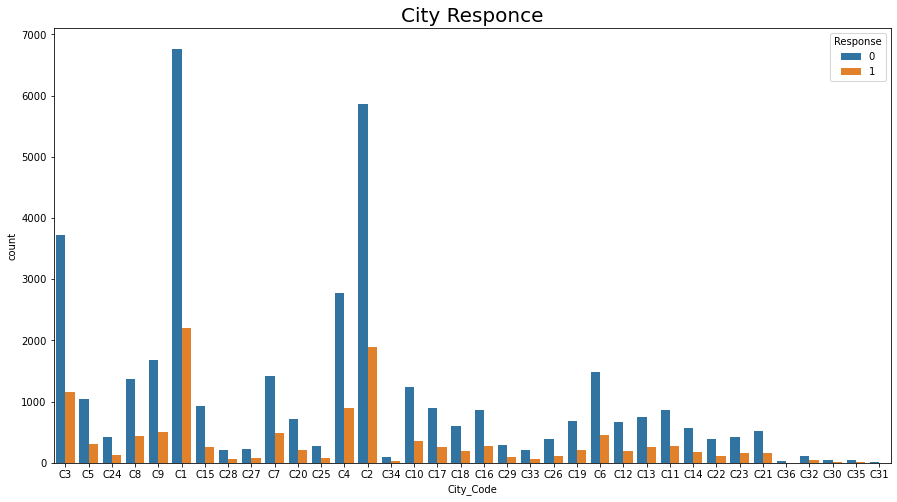

In [143]:
plt.figure(figsize=(15,8))
plt.title('City Responce', fontsize=20)
sns.countplot(x="City_Code",data=train,hue="Response")
plt.show()

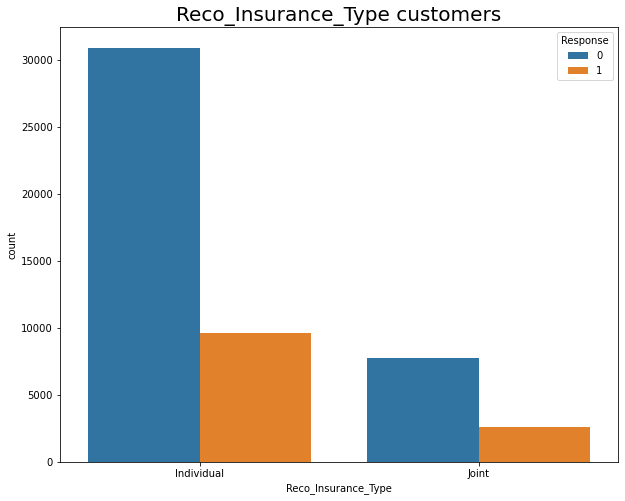

In [144]:
plt.figure(figsize=(10,8))
plt.title('Reco_Insurance_Type customers', fontsize=20)
sns.countplot(x="Reco_Insurance_Type",data=train,hue="Response")
plt.show()

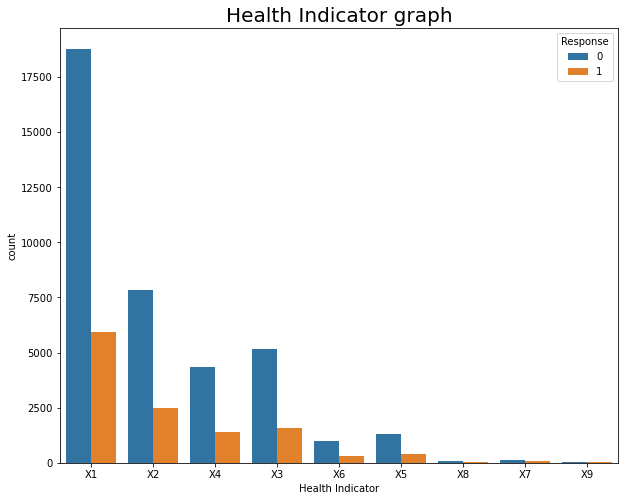

In [145]:
plt.figure(figsize=(10,8))
plt.title('Health Indicator graph', fontsize=20)
sns.countplot(x="Health Indicator",data=train,hue="Response")
plt.show()

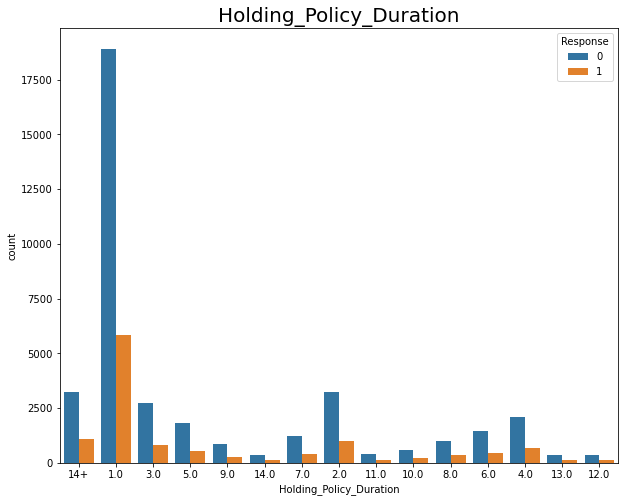

In [146]:
plt.figure(figsize=(10,8))
plt.title('Holding_Policy_Duration', fontsize=20)
sns.countplot(x="Holding_Policy_Duration",data=train,hue="Response")
plt.show()

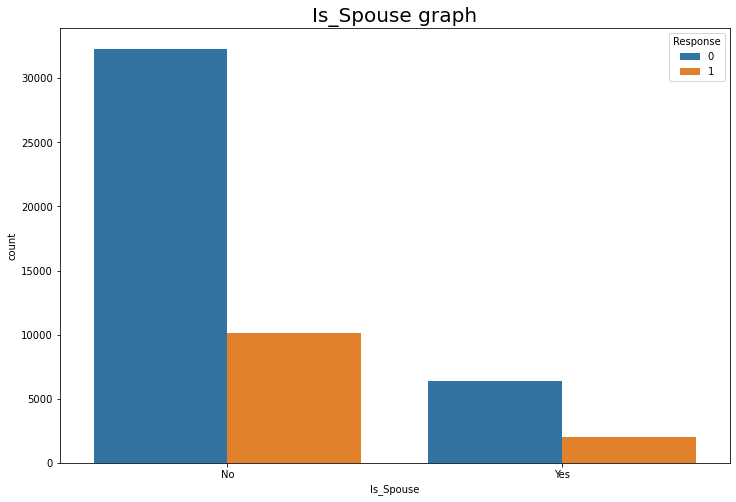

In [147]:
plt.figure(figsize=(12,8))
plt.title('Is_Spouse graph', fontsize=20)
sns.countplot(x="Is_Spouse",data=train,hue="Response")
plt.show()

In [148]:
train.Reco_Insurance_Type.unique()

array(['Individual', 'Joint'], dtype=object)

In [149]:
y = train['Response']

In [150]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Response, dtype: int64

In [151]:
ntrain = train.shape[0]
ntest = test.shape[0]

data =pd.concat((train, test)).reset_index(drop = True) 

In [152]:
data.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0.0
1,2,C5,1117,Owned,Joint,75,22,No,X2,1.0,3.0,22,30510.0,0.0
2,3,C5,3732,Owned,Individual,32,32,No,X1,1.0,1.0,19,7450.0,1.0
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0.0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0.0


In [153]:
data.shape

(72687, 14)

In [154]:
data = data.drop(['Response'], axis=1)

In [155]:
data

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0
1,2,C5,1117,Owned,Joint,75,22,No,X2,1.0,3.0,22,30510.0
2,3,C5,3732,Owned,Individual,32,32,No,X1,1.0,1.0,19,7450.0
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72682,72683,C3,1044,Owned,Individual,45,45,No,X1,4.0,1.0,18,15884.0
72683,72684,C4,266,Owned,Individual,59,59,No,X5,6.0,3.0,18,21390.0
72684,72685,C12,2470,Owned,Individual,74,74,No,X3,14+,3.0,1,17836.0
72685,72686,C10,1676,Rented,Individual,25,25,No,X4,3.0,1.0,19,11568.0


In [156]:
city_code_reco_ins_type = data.City_Code+' '+data.Reco_Insurance_Type

In [157]:
UpperAge_HealthIndicator = (data.Upper_Age//10).astype(str)+' '+data['Health Indicator']

In [158]:
UpperAge_HealthIndicator

0        3 X1
1        7 X2
2        3 X1
3        5 X1
4        4 X2
         ... 
72682    4 X1
72683    5 X5
72684    7 X3
72685    2 X4
72686    7 X2
Length: 72687, dtype: object

In [159]:
RecoPolicy_HealthIndicator = (data.Reco_Policy_Cat//10).astype(str)+' '+data['Health Indicator']

In [160]:
RegionCode_AccomodationType = (data.Region_Code//10).astype(str)+' '+data['Accomodation_Type']

In [161]:
data['mean_premium_per_region_code'] = data.groupby('Region_Code')['Reco_Policy_Premium'].transform('mean')

data['mean_premium_Reco_Policy_Cat'] = data.groupby('Reco_Policy_Cat')['Reco_Policy_Premium'].transform('mean')

data['mean_premium_Upper_Age'] = data.groupby('Upper_Age')['Reco_Policy_Premium'].transform('mean')

data['mean_premium_Lower_Age'] = data.groupby('Lower_Age')['Reco_Policy_Premium'].transform('mean')

data['mean_premium_Holding_Policy_Type'] = data.groupby('Holding_Policy_Type')['Reco_Policy_Premium'].transform('mean')

In [162]:
data.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,mean_premium_per_region_code,mean_premium_Reco_Policy_Cat,mean_premium_Upper_Age,mean_premium_Lower_Age,mean_premium_Holding_Policy_Type
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,12130.080000,14589.814674,11897.521201,12344.261351,13740.303578
1,2,C5,1117,Owned,Joint,75,22,No,X2,1.0,3.0,22,30510.0,16076.342857,14589.814674,23286.775041,8848.816462,13740.303578
2,3,C5,3732,Owned,Individual,32,32,No,X1,1.0,1.0,19,7450.0,11336.000000,14714.576838,10158.354717,10983.887528,14404.622423
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,14329.200000,14714.576838,16365.677299,15053.030179,13740.303578
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,16664.157143,14264.687867,13523.956453,13841.541389,14404.622423


In [163]:
City_Code = data[['City_Code']]

City_Code = pd.get_dummies(City_Code, drop_first=True)

City_Code

,City_Code_C10,City_Code_C11,City_Code_C12,City_Code_C13,City_Code_C14,City_Code_C15,City_Code_C16,City_Code_C17,City_Code_C18,City_Code_C19,...,City_Code_C33,City_Code_C34,City_Code_C35,City_Code_C36,City_Code_C4,City_Code_C5,City_Code_C6,City_Code_C7,City_Code_C8,City_Code_C9
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72682,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72683,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
72684,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72685,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [164]:
Accomodation_Type = data[['Accomodation_Type']]
Accomodation_Type = pd.get_dummies(Accomodation_Type, drop_first=True)
Accomodation_Type.head()

,Accomodation_Type_Rented
0,1
1,0
2,0
3,0
4,1


In [165]:
Reco_Insurance_Type = data[['Reco_Insurance_Type']]
Reco_Insurance_Type = pd.get_dummies(Reco_Insurance_Type, drop_first=True)
Reco_Insurance_Type.head()

,Reco_Insurance_Type_Joint
0,0
1,1
2,0
3,1
4,0


In [166]:
Holding_Policy_Type = data[['Holding_Policy_Type']]
Holding_Policy_Type = pd.get_dummies(Holding_Policy_Type, drop_first = True)
Holding_Policy_Type

,Holding_Policy_Type
0,3.0
1,3.0
2,1.0
3,3.0
4,1.0
...,...
72682,1.0
72683,3.0
72684,3.0
72685,1.0


In [167]:
Is_Spouse = data[['Is_Spouse']]
Is_Spouse = pd.get_dummies(Is_Spouse, drop_first = True)
Is_Spouse

,Is_Spouse_Yes
0,0
1,0
2,0
3,0
4,0
...,...
72682,0
72683,0
72684,0
72685,0


In [168]:
data['Holding_Policy_Duration'].unique()

array(['14+', '1.0', '3.0', '5.0', '9.0', '14.0', '7.0', '2.0', '11.0',
       '10.0', '8.0', '6.0', '4.0', '13.0', '12.0'], dtype=object)

In [169]:
from sklearn import preprocessing

In [170]:
label_encoder = preprocessing.LabelEncoder()

In [171]:
data['Holding_Policy_Duration']=label_encoder.fit_transform(data['Holding_Policy_Duration'])

In [182]:
data['Health Indicator']=label_encoder.fit_transform(data['Health Indicator'])

In [183]:
final_data = pd.concat([data, City_Code, Accomodation_Type, Reco_Insurance_Type, Holding_Policy_Type, Is_Spouse], axis=1)

In [184]:
final_data.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,...,City_Code_C4,City_Code_C5,City_Code_C6,City_Code_C7,City_Code_C8,City_Code_C9,Accomodation_Type_Rented,Reco_Insurance_Type_Joint,Holding_Policy_Type,Is_Spouse_Yes
0,1,C3,3213,Rented,Individual,36,36,No,0,5,...,0,0,0,0,0,0,1,0,3.0,0
1,2,C5,1117,Owned,Joint,75,22,No,1,0,...,0,1,0,0,0,0,0,1,3.0,0
2,3,C5,3732,Owned,Individual,32,32,No,0,0,...,0,1,0,0,0,0,0,0,1.0,0
3,4,C24,4378,Owned,Joint,52,48,No,0,5,...,0,0,0,0,0,0,0,1,3.0,0
4,5,C8,2190,Rented,Individual,44,44,No,1,8,...,0,0,0,0,1,0,1,0,1.0,0


In [185]:
z = final_data['ID']

In [186]:
final_data.drop(['ID','City_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Holding_Policy_Type', 'Is_Spouse'], axis=1, inplace=True)

In [187]:
final_data.head()

,Region_Code,Upper_Age,Lower_Age,Health Indicator,Holding_Policy_Duration,Reco_Policy_Cat,Reco_Policy_Premium,mean_premium_per_region_code,mean_premium_Reco_Policy_Cat,mean_premium_Upper_Age,...,City_Code_C36,City_Code_C4,City_Code_C5,City_Code_C6,City_Code_C7,City_Code_C8,City_Code_C9,Accomodation_Type_Rented,Reco_Insurance_Type_Joint,Is_Spouse_Yes
0,3213,36,36,0,5,22,11628.0,12130.080000,14589.814674,11897.521201,...,0,0,0,0,0,0,0,1,0,0
1,1117,75,22,1,0,22,30510.0,16076.342857,14589.814674,23286.775041,...,0,0,1,0,0,0,0,0,1,0
2,3732,32,32,0,0,19,7450.0,11336.000000,14714.576838,10158.354717,...,0,0,1,0,0,0,0,0,0,0
3,4378,52,48,0,5,19,17780.0,14329.200000,14714.576838,16365.677299,...,0,0,0,0,0,0,0,0,1,0
4,2190,44,44,1,8,16,10404.0,16664.157143,14264.687867,13523.956453,...,0,0,0,0,0,1,0,1,0,0


In [188]:
trainX = final_data[:ntrain]
testX = final_data[ntrain:]

In [189]:
trainX.shape, testX.shape

((50882, 50), (21805, 50))

In [190]:
from sklearn.model_selection import train_test_split

In [191]:
df1=train.copy()
df2=test.copy()

In [216]:
X = trainX

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [231]:
sample_submmission=pd.read_csv("G:/JOB-A-Thon/sample_submission_QrCyCoT.csv")

In [232]:
sample_submmission.head()

,ID,Response
0,50883,0
1,50884,0
2,50885,0
3,50886,0
4,50887,0


In [233]:
lgbm = LGBMClassifier(n_estimators=150)
lgbm.fit(X_train, y_train)
pred = lgbm.predict(X_test)
lgbm.score(X_test, y_test)

0.7622011136586964

In [234]:
import xgboost as xgb
model=xgb.XGBClassifier(learning_rate =0.005,
 n_estimators=1000,
 max_depth=9,
 min_child_weight=5,
 subsample=1,
 colsample_bytree=0.8,
 objective= 'reg:linear',
    random_state=42)

In [235]:
model.fit(X_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:33:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.005, max_delta_step=0, max_depth=9,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, num_parallel_tree=1,
              objective='reg:linear', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [236]:
pred = model.predict(X_test)

In [237]:
model.score(X_test, y_test)

0.7610219456272519

In [238]:
model.score(X_train, y_train)

0.7889490973411573

In [239]:
params = {
    "learning_rate"    :[0.03, 0.04, 0.05, 0.07, 0.08, 0.10, 0.15, 0.20, 0.25, 0.30],
    "max_depth"        :[3, 4, 5, 6, 7, 8, 9 ,10, 11, 12, 13, 14, 15 ,16, 17, 18, 19, 20],
    "min_child_weight" :[1, 3, 5, 7, 9],
    "gamma"            :[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    "colsample_bytree" :[0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95],
}

In [245]:
testX

,Region_Code,Upper_Age,Lower_Age,Health Indicator,Holding_Policy_Duration,Reco_Policy_Cat,Reco_Policy_Premium,mean_premium_per_region_code,mean_premium_Reco_Policy_Cat,mean_premium_Upper_Age,...,City_Code_C36,City_Code_C4,City_Code_C5,City_Code_C6,City_Code_C7,City_Code_C8,City_Code_C9,Accomodation_Type_Rented,Reco_Insurance_Type_Joint,Is_Spouse_Yes
50882,156,30,30,0,11,5,11934.0,16724.693617,16082.540812,10291.494600,...,0,0,0,0,0,0,0,0,0,0
50883,7,69,68,0,8,18,32204.8,12710.545455,14662.230748,20852.133099,...,0,1,0,0,0,0,0,0,1,1
50884,564,28,28,2,7,17,9240.0,16736.838710,14891.907034,8859.590370,...,0,0,0,0,0,0,0,1,0,0
50885,1177,23,23,2,8,18,9086.0,14373.669565,14662.230748,7232.583679,...,0,0,0,0,0,0,0,1,0,0
50886,951,75,75,2,5,5,22534.0,15725.816000,16082.540812,23286.775041,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72682,1044,45,45,0,9,18,15884.0,13876.583333,14662.230748,14787.071076,...,0,0,0,0,0,0,0,0,0,0
72683,266,59,59,4,11,18,21390.0,12720.573684,14662.230748,17750.819823,...,0,1,0,0,0,0,0,0,0,0
72684,2470,74,74,2,5,1,17836.0,13974.133333,12876.317189,22439.655657,...,0,0,0,0,0,0,0,0,0,0
72685,1676,25,25,3,8,19,11568.0,12635.666667,14714.576838,8548.697187,...,0,0,0,0,0,0,0,1,0,0


In [251]:
pred_final = model.predict_proba(testX)[:,1]

In [261]:
final_sub = test.iloc[:,0:1]

In [262]:
final_sub['Response'] = pred_final

In [265]:
final_sub.to_csv('final_sub.csv',index=False)

In [264]:
pwd

'C:\\Users\\HP'

In [266]:
params = {
    "learning_rate"    :[0.03, 0.04, 0.05, 0.07, 0.08, 0.10, 0.15, 0.20, 0.25, 0.30],
    "max_depth"        :[3, 4, 5, 6, 7, 8, 9 ,10, 11, 12, 13, 14, 15 ,16, 17, 18, 19, 20],
    "min_child_weight" :[1, 3, 5, 7, 9],
    "gamma"            :[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    "colsample_bytree" :[0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95],
}

In [267]:
from sklearn.model_selection import RandomizedSearchCV 

In [270]:
random = RandomizedSearchCV(model, param_distributions=params, n_iter=5, scoring='roc_auc', cv=5, verbose=3)

In [271]:
random.fit(trainX, y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] min_child_weight=5, max_depth=15, learning_rate=0.05, gamma=0.5, colsample_bytree=0.6 
[22:10:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[CV]  min_child_weight=5, max_depth=15, learning_rate=0.05, gamma=0.5, colsample_bytree=0.6, score=0.703, total= 1.9min
[CV] min_child_weight=5, max_depth=15, learning_rate=0.05, gamma=0.5, colsample_bytree=0.6 
[22:11:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.9min remaining:    0.0s
C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[CV]  min_child_weight=5, max_depth=15, learning_rate=0.05, gamma=0.5, colsample_bytree=0.6, score=0.700, total= 3.0min
[CV] min_child_weight=5, max_depth=15, learning_rate=0.05, gamma=0.5, colsample_bytree=0.6 
[22:14:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  4.9min remaining:    0.0s
C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[CV]  min_child_weight=5, max_depth=15, learning_rate=0.05, gamma=0.5, colsample_bytree=0.6, score=0.699, total= 3.3min
[CV] min_child_weight=5, max_depth=15, learning_rate=0.05, gamma=0.5, colsample_bytree=0.6 


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:18:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  min_child_weight=5, max_depth=15, learning_rate=0.05, gamma=0.5, colsample_bytree=0.6, score=0.696, total= 3.5min
[CV] min_child_weight=5, max_depth=15, learning_rate=0.05, gamma=0.5, colsample_bytree=0.6 


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:21:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  min_child_weight=5, max_depth=15, learning_rate=0.05, gamma=0.5, colsample_bytree=0.6, score=0.689, total= 3.3min
[CV] min_child_weight=1, max_depth=19, learning_rate=0.03, gamma=0.8, colsample_bytree=0.3 
[22:25:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.

C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[CV]  min_child_weight=1, max_depth=19, learning_rate=0.03, gamma=0.8, colsample_bytree=0.3, score=0.710, total= 3.1min
[CV] min_child_weight=1, max_depth=19, learning_rate=0.03, gamma=0.8, colsample_bytree=0.3 


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:28:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  min_child_weight=1, max_depth=19, learning_rate=0.03, gamma=0.8, colsample_bytree=0.3, score=0.710, total= 2.9min
[CV] min_child_weight=1, max_depth=19, learning_rate=0.03, gamma=0.8, colsample_bytree=0.3 


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:31:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  min_child_weight=1, max_depth=19, learning_rate=0.03, gamma=0.8, colsample_bytree=0.3, score=0.714, total= 2.8min
[CV] min_child_weight=1, max_depth=19, learning_rate=0.03, gamma=0.8, colsample_bytree=0.3 


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:33:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  min_child_weight=1, max_depth=19, learning_rate=0.03, gamma=0.8, colsample_bytree=0.3, score=0.708, total= 2.8min
[CV] min_child_weight=1, max_depth=19, learning_rate=0.03, gamma=0.8, colsample_bytree=0.3 


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:36:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  min_child_weight=1, max_depth=19, learning_rate=0.03, gamma=0.8, colsample_bytree=0.3, score=0.704, total= 2.7min
[CV] min_child_weight=7, max_depth=6, learning_rate=0.08, gamma=0.2, colsample_bytree=0.75 


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:39:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  min_child_weight=7, max_depth=6, learning_rate=0.08, gamma=0.2, colsample_bytree=0.75, score=0.674, total= 1.5min
[CV] min_child_weight=7, max_depth=6, learning_rate=0.08, gamma=0.2, colsample_bytree=0.75 
[22:40:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.

C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[CV]  min_child_weight=7, max_depth=6, learning_rate=0.08, gamma=0.2, colsample_bytree=0.75, score=0.672, total= 1.4min
[CV] min_child_weight=7, max_depth=6, learning_rate=0.08, gamma=0.2, colsample_bytree=0.75 
[22:42:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.

C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[CV]  min_child_weight=7, max_depth=6, learning_rate=0.08, gamma=0.2, colsample_bytree=0.75, score=0.675, total= 1.4min
[CV] min_child_weight=7, max_depth=6, learning_rate=0.08, gamma=0.2, colsample_bytree=0.75 
[22:43:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.

C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[CV]  min_child_weight=7, max_depth=6, learning_rate=0.08, gamma=0.2, colsample_bytree=0.75, score=0.677, total= 1.4min
[CV] min_child_weight=7, max_depth=6, learning_rate=0.08, gamma=0.2, colsample_bytree=0.75 


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:45:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  min_child_weight=7, max_depth=6, learning_rate=0.08, gamma=0.2, colsample_bytree=0.75, score=0.665, total= 1.4min
[CV] min_child_weight=7, max_depth=8, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8 
[22:46:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.

C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[CV]  min_child_weight=7, max_depth=8, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8, score=0.682, total= 2.0min
[CV] min_child_weight=7, max_depth=8, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8 
[22:48:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.

C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[CV]  min_child_weight=7, max_depth=8, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8, score=0.682, total= 2.0min
[CV] min_child_weight=7, max_depth=8, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8 
[22:50:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.

C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[CV]  min_child_weight=7, max_depth=8, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8, score=0.681, total= 2.0min
[CV] min_child_weight=7, max_depth=8, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8 


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:52:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  min_child_weight=7, max_depth=8, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8, score=0.686, total= 2.1min
[CV] min_child_weight=7, max_depth=8, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8 
[22:54:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.

C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[CV]  min_child_weight=7, max_depth=8, learning_rate=0.03, gamma=0.4, colsample_bytree=0.8, score=0.675, total= 2.0min
[CV] min_child_weight=1, max_depth=3, learning_rate=0.2, gamma=0.0, colsample_bytree=0.4 
[22:56:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.

C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[CV]  min_child_weight=1, max_depth=3, learning_rate=0.2, gamma=0.0, colsample_bytree=0.4, score=0.659, total=  32.9s
[CV] min_child_weight=1, max_depth=3, learning_rate=0.2, gamma=0.0, colsample_bytree=0.4 
[22:57:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.

C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[CV]  min_child_weight=1, max_depth=3, learning_rate=0.2, gamma=0.0, colsample_bytree=0.4, score=0.653, total=  33.9s
[CV] min_child_weight=1, max_depth=3, learning_rate=0.2, gamma=0.0, colsample_bytree=0.4 
[22:57:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.

C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[CV]  min_child_weight=1, max_depth=3, learning_rate=0.2, gamma=0.0, colsample_bytree=0.4, score=0.651, total=  34.2s
[CV] min_child_weight=1, max_depth=3, learning_rate=0.2, gamma=0.0, colsample_bytree=0.4 
[22:58:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV]  min_child_weight=1, max_depth=3, learning_rate=0.2, gamma=0.0, colsample_bytree=0.4, score=0.656, total=  34.7s
[CV] min_child_weight=1, max_depth=3, learning_rate=0.2, gamma=0.0, colsample_bytree=0.4 


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:59:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  min_child_weight=1, max_depth=3, learning_rate=0.2, gamma=0.0, colsample_bytree=0.4, score=0.643, total=  32.3s
[22:59:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed: 49.6min finished
C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=0.8, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.005,
                                           max_delta_step=0, max_depth=9,
                                           min_child_weight=5, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=1000, n_jobs=4,
                                           num_paral...
                   n_iter=5,
                   param_distributions={'colsample_bytree': [0.3, 0.35, 0.4,
                              

In [302]:
random.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.8, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.03, max_delta_step=0, max_depth=19,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, num_parallel_tree=1,
              objective='reg:linear', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [303]:
random.best_params_

{'min_child_weight': 1,
 'max_depth': 19,
 'learning_rate': 0.03,
 'gamma': 0.8,
 'colsample_bytree': 0.3}

In [304]:
XGB = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.8, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.03, max_delta_step=0, max_depth=19,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, num_parallel_tree=1,
              objective='reg:linear', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [305]:
XGB.fit(X_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:49:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.8, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.03, max_delta_step=0, max_depth=19,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, num_parallel_tree=1,
              objective='reg:linear', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [306]:
pred = XGB.predict(X_test)

In [307]:
XGB.score(X_test, y_test)

0.7608909269570914

In [308]:
pred_final = XGB.predict_proba(testX)[:,1]

In [309]:
final_submission = test.iloc[:,0:1]

In [310]:
final_submission['Response'] = pred_final

In [311]:
final_submission.to_csv('final_submission.csv',index=False)

In [312]:
from sklearn.ensemble import RandomForestClassifier

In [313]:
rc = RandomForestClassifier()

In [314]:
rc.fit(X_train, y_train)

RandomForestClassifier()

In [315]:
pred = rc.predict(X_test)

In [316]:
rc.score(X_test, y_test)

0.7558467081559123

In [317]:
pred_final = rc.predict_proba(testX)[:,1]

In [318]:
final_submission1 = test.iloc[:,0:1]

In [319]:
final_submission1['Response'] = pred_final

In [320]:
final_submission1.to_csv('final_submission1.csv',index=False)